In [1]:
import pandas as pd
import numpy as np
import plotly.colors
import plotly.graph_objects as go
import chart_studio.plotly as py
import plotly.express as px
import json
from urllib.request import urlopen
import requests

In [165]:
url = 'https://raw.githubusercontent.com/eurostat/Nuts2json/master/2016/4326/10M/nutsrg_1.json'
nuts2 = requests.get(url).json()

In [166]:
nuts2

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'id': 'AT1', 'na': 'OSTÖSTERREICH'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[15.542527126356319, 48.9076403820191],
      [15.753462673133654, 48.85174758737937],
      [15.846417320866045, 48.86002800140007],
      [16.07522876143807, 48.75652282614131],
      [16.307615380769036, 48.73375168758438],
      [16.393419670983548, 48.74410220511026],
      [16.475648782439123, 48.79999499974999],
      [16.56502825141257, 48.80206510325516],
      [16.70803540177009, 48.73375168758438],
      [16.88321916095805, 48.710980549027454],
      [16.940422021101057, 48.61782589129457],
      [16.951147557377865, 48.535021751087555],
      [16.851042552127602, 48.43772688634432],
      [16.854617730886545, 48.352852642632136],
      [16.94757237861893, 48.26176808840442],
      [16.976173808690433, 48.172753637681886],
      [17.06555327766388, 48.11893094654733],
      [17.076278813940696, 48.03819

In [167]:
names = (pd.DataFrame(
            pd.DataFrame.from_dict(pd.read_json(url)['features'].to_dict())
                .loc['properties']
                .to_dict())
        .T
        .set_index('id')
        .na)

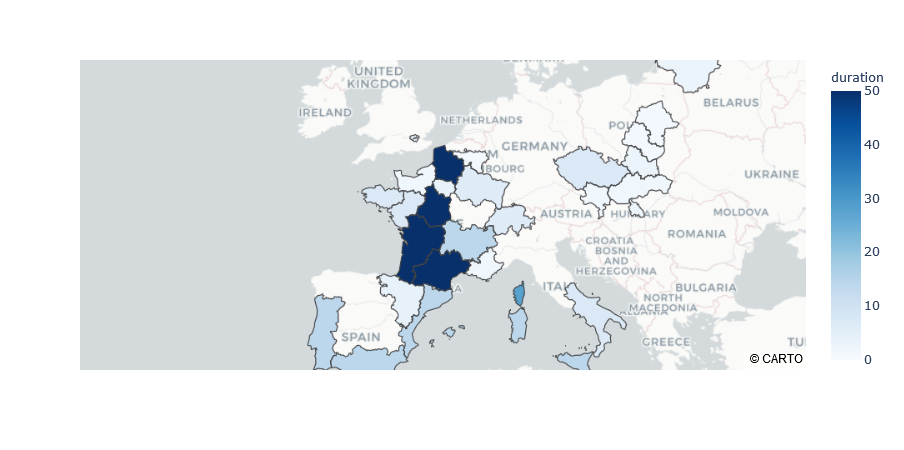

In [168]:
df = (pd.read_excel('data/traveling_history.xlsx')
        .groupby('NUTS1')
        .agg({'year': np.mean, 'duration': np.sum}))
df['name'] = df.index.map(names)
fig = px.choropleth_mapbox(
    df,    
    geojson=nuts2, 
    featureidkey='properties.id',
    hover_name=df.index.map(names),
    locations=df.index, 
    color='duration', 
    color_continuous_scale="blues",
    range_color=(0, 50),
    mapbox_style="carto-positron",
    center={'lon': 2.39, 'lat': 47.09},
    zoom=3)
fig.show()